<a href="https://colab.research.google.com/github/Asad-Khan-AI/Advanced-Artificial-Intelligence/blob/main/Lab_2_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import time
import random
import argparse
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import Dataset, DataLoader
#import pandas_profiling as pdp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import argparse
from os import path
import os

#scikit-learn related imports
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# pytorch relates imports
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import TensorDataset, DataLoader


!pip install captum

# imports from captum library
from captum.attr import LayerConductance, LayerActivation, LayerIntegratedGradients
from captum.attr import DeepLift, KernelShap, DeepLiftShap, ShapleyValueSampling

from captum.attr import Lime, LimeBase
from captum._utils.models.linear_model import SkLearnLinearRegression, SkLearnLasso
from captum.attr._core.lime import get_exp_kernel_similarity_function
from torch.utils.data import Dataset, DataLoader
from captum.attr import (
    IntegratedGradients,
    LayerIntegratedGradients,
    TokenReferenceBase,
    configure_interpretable_embedding_layer,
    remove_interpretable_embedding_layer,
    visualization
)
from captum.attr._utils.input_layer_wrapper import ModelInputWrapper

!pip install lime
!pip install tensorflow
!pip install keras
!pip install sharp

import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model


  Using cached sharp-1.0.2.tar.gz (107 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for sharp
  Running setup.py clean for sharp
Failed to build sharp
ERROR: Could not build wheels for sharp, which is required to install pyproject.toml-based projects


In [ ]:
!pip install lime shap

Loading and preprocessing data...
Converting data to tensors...
Training the model...
Epoch [5/5000], Loss: 13.1666
Epoch [10/5000], Loss: 11.6265
Epoch [15/5000], Loss: 9.1702
Epoch [20/5000], Loss: 5.3338
Epoch [25/5000], Loss: 1.6545
Epoch [30/5000], Loss: 2.2230
Epoch [35/5000], Loss: 1.8277
Epoch [40/5000], Loss: 1.2799
Epoch [45/5000], Loss: 1.5161
Epoch [50/5000], Loss: 1.3885
Epoch [55/5000], Loss: 1.2503
Epoch [60/5000], Loss: 1.3049
Epoch [65/5000], Loss: 1.2614
Epoch [70/5000], Loss: 1.2433
Epoch [75/5000], Loss: 1.2507
Epoch [80/5000], Loss: 1.2344
Epoch [85/5000], Loss: 1.2333
Epoch [90/5000], Loss: 1.2302
Epoch [95/5000], Loss: 1.2256
Epoch [100/5000], Loss: 1.2244
Epoch [105/5000], Loss: 1.2212
Epoch [110/5000], Loss: 1.2196
Epoch [115/5000], Loss: 1.2173
Epoch [120/5000], Loss: 1.2154
Epoch [125/5000], Loss: 1.2138
Epoch [130/5000], Loss: 1.2121
Epoch [135/5000], Loss: 1.2107
Epoch [140/5000], Loss: 1.2095
Epoch [145/5000], Loss: 1.2083
Epoch [150/5000], Loss: 1.2072
Ep

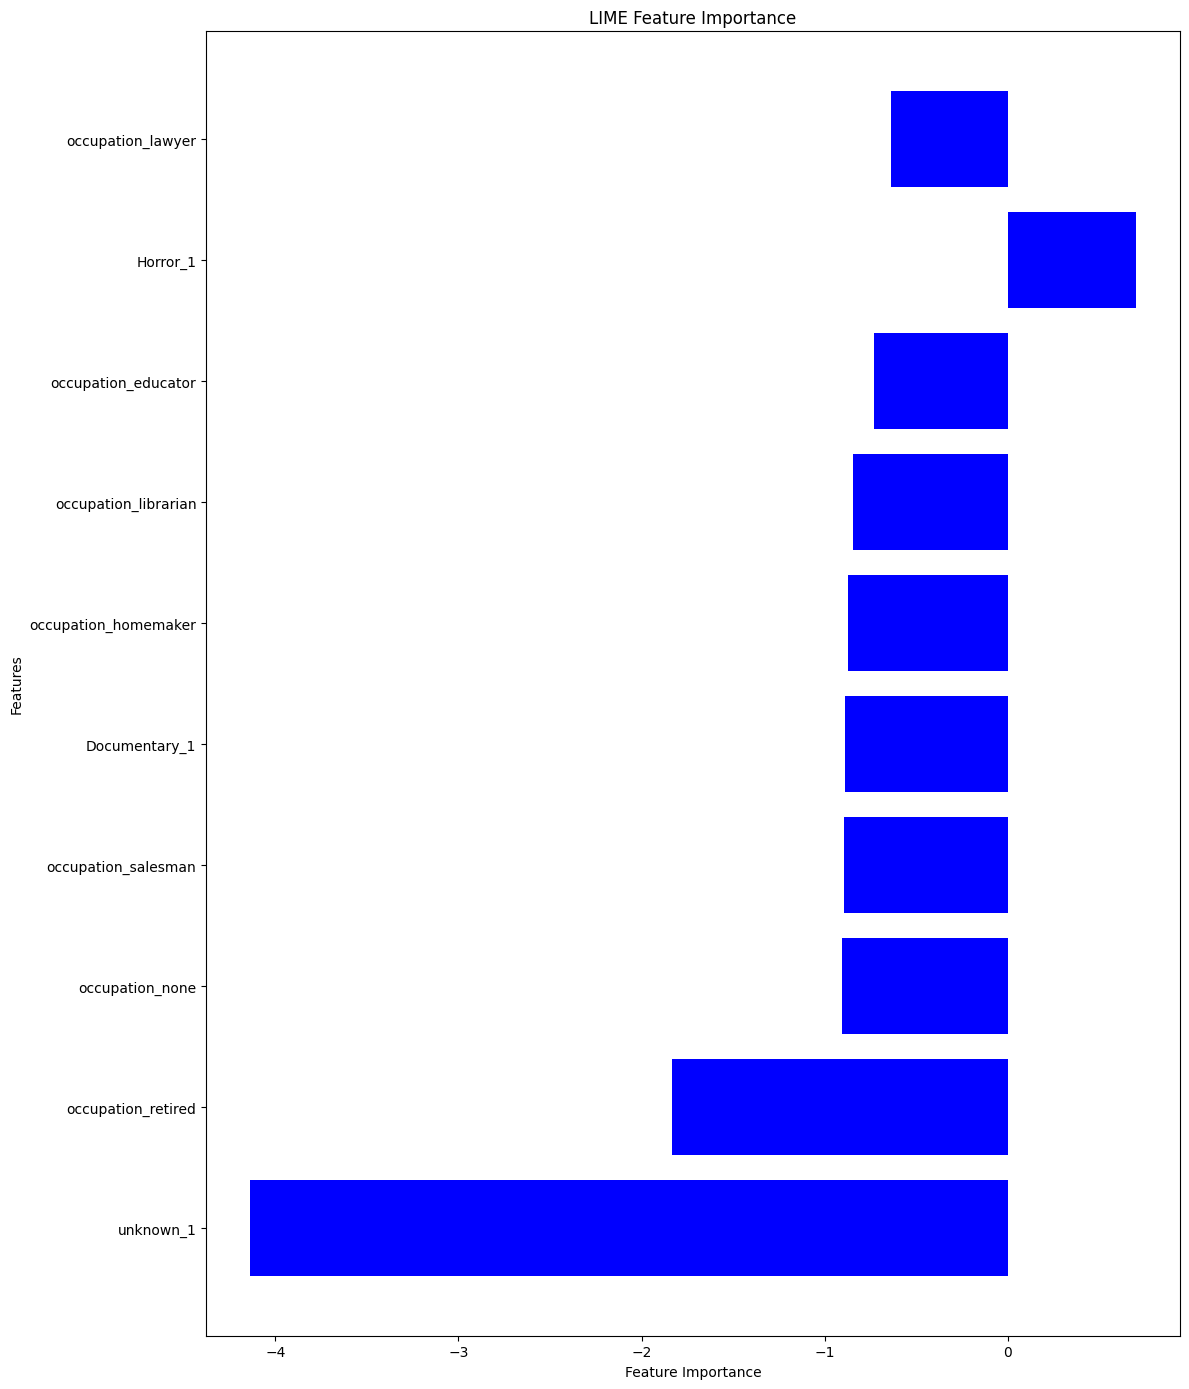

LIME feature importances plotted successfully.
Applying SHAP...
Initializing SHAP explainer...
Computing SHAP values...
SHAP values computed.


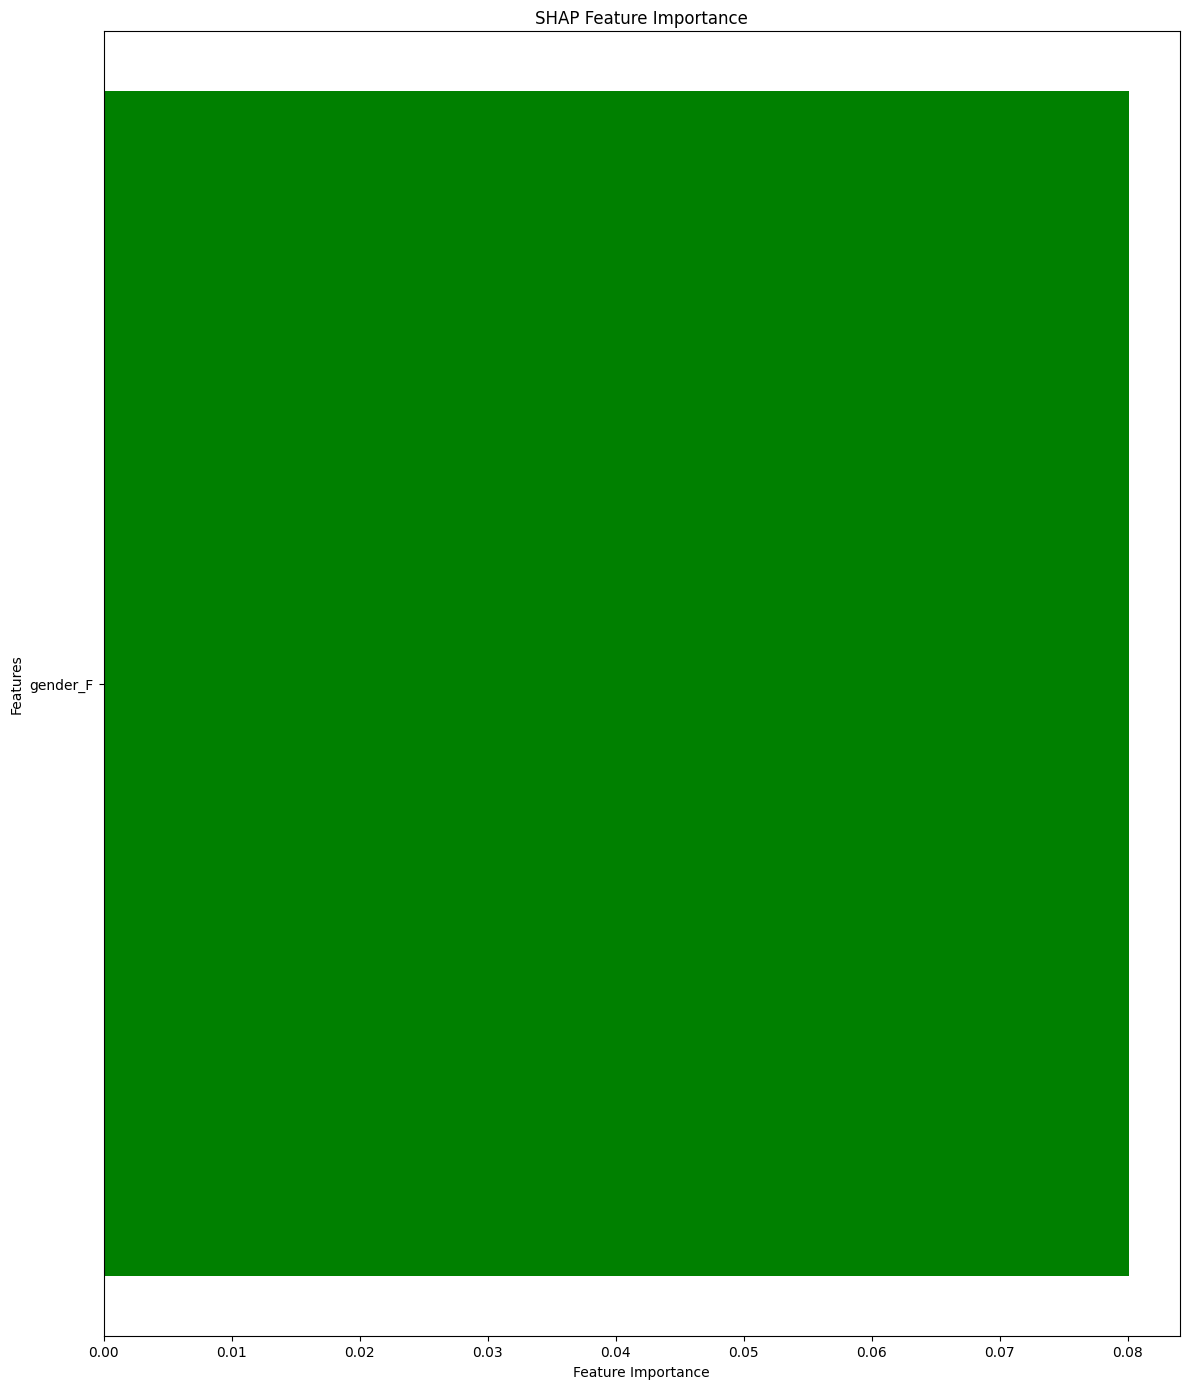

SHAP feature importances plotted successfully.
Applying Integrated Gradients...


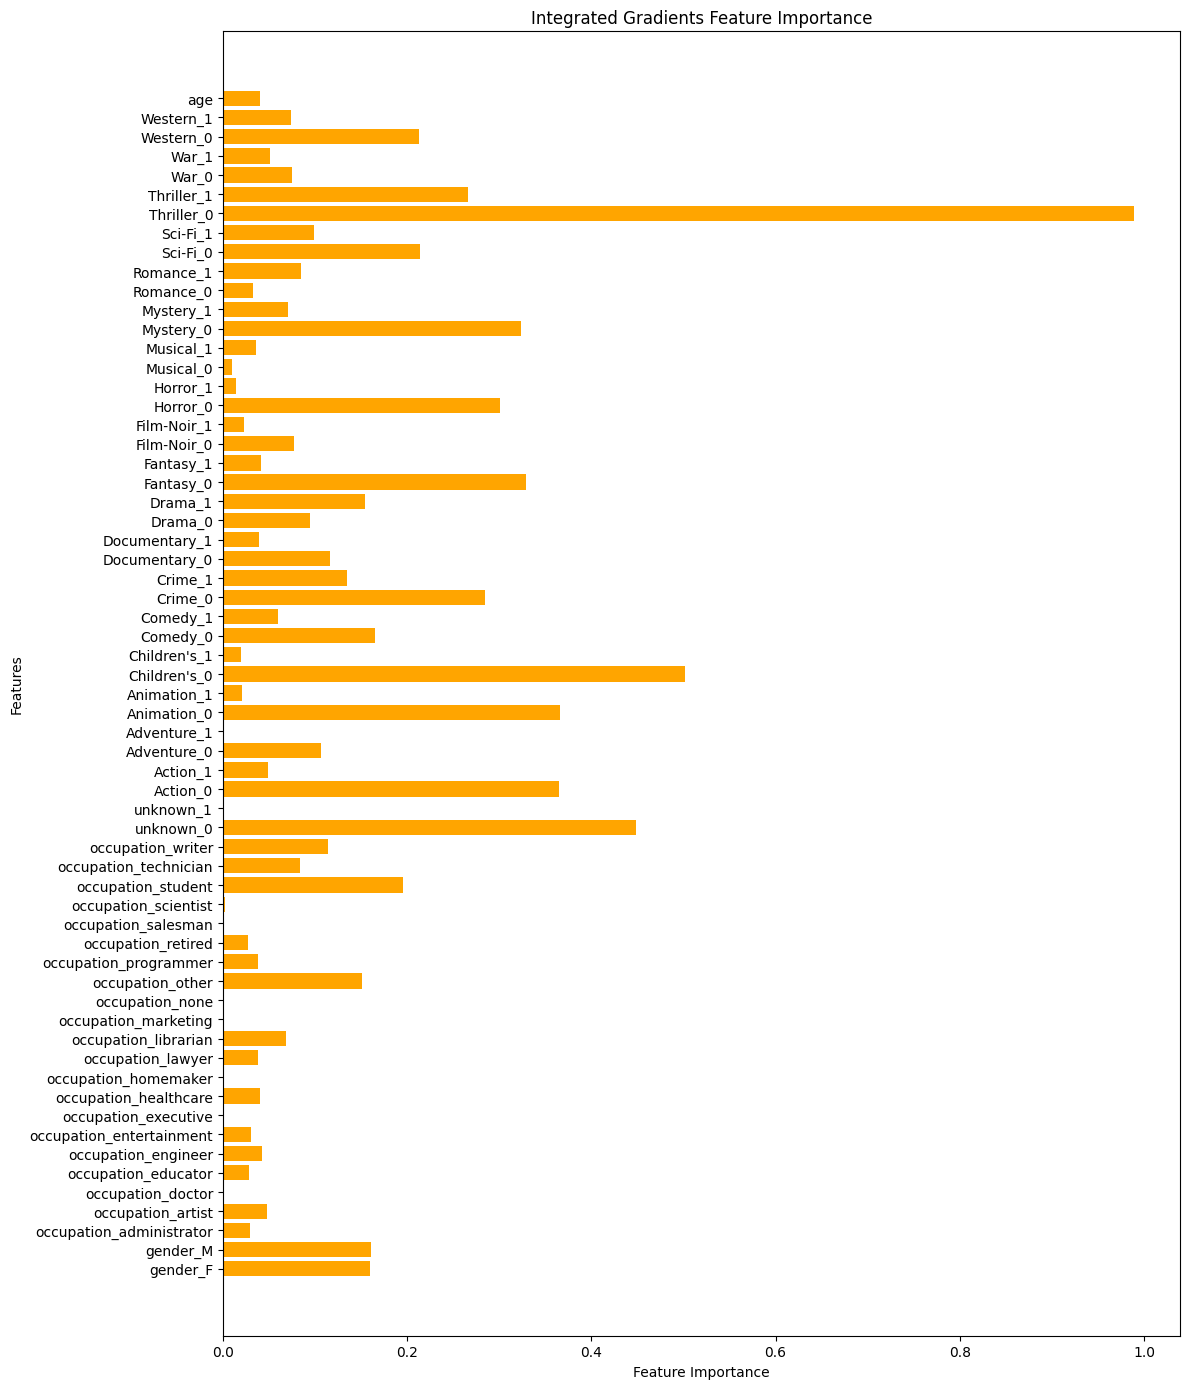

Integrated Gradients feature importances plotted successfully.
Plotting comparison of feature importances from LIME, SHAP, and Integrated Gradients...


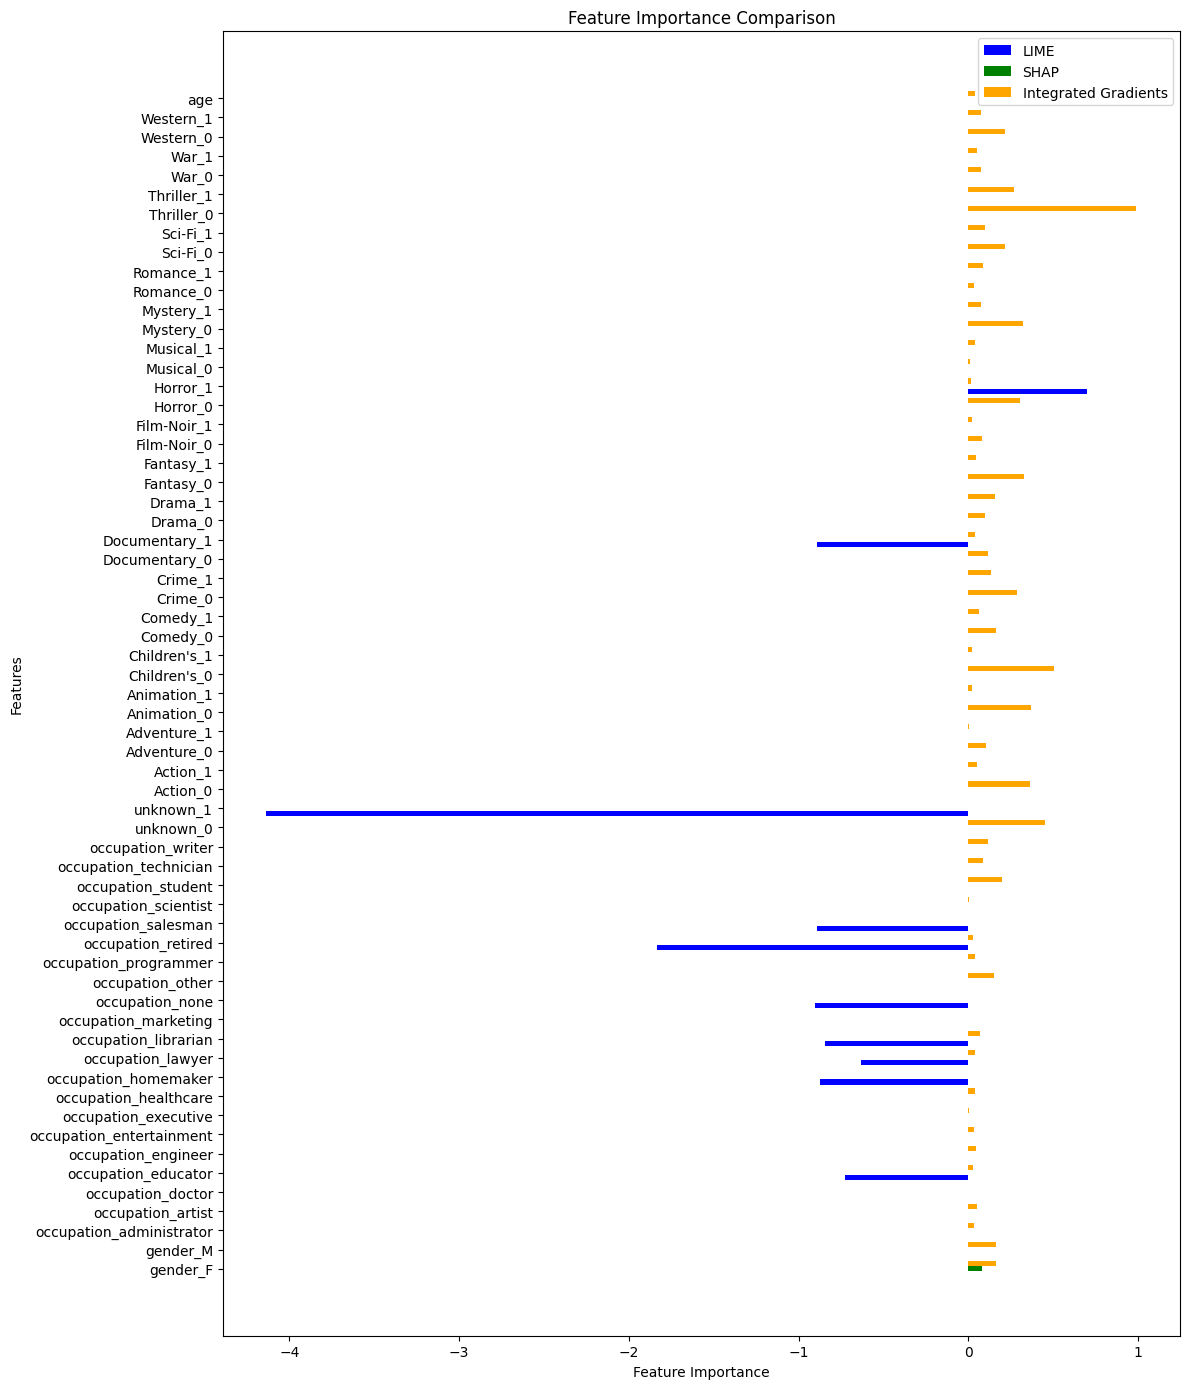

Comparison plot created successfully.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import lime
import lime.lime_tabular
import shap
import matplotlib.pyplot as plt
from captum.attr import IntegratedGradients

# Load and preprocess data
def load_data():
    # Load user-item ratings data
    data_columns = ['user_id', 'item_id', 'rating', 'timestamp']
    data = pd.read_csv('u.data', sep='\t', names=data_columns)

    # Load user demographic data
    user_columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
    users = pd.read_csv('u.user', sep='|', names=user_columns)

    # Load item (movie) data
    item_columns = ['item_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
    items = pd.read_csv('u.item', sep='|', encoding='latin-1', names=item_columns)

    # Merge dataframes to create a unified dataset
    data = data.merge(users, on='user_id').merge(items, on='item_id')

    # Specify categorical features and encode them using one-hot encoding
    categorical_features = ['gender', 'occupation', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
    one_hot_encoder = OneHotEncoder()
    encoded_categorical = one_hot_encoder.fit_transform(data[categorical_features]).toarray()
    categorical_feature_names = one_hot_encoder.get_feature_names_out(categorical_features)

    # Specify numerical features and scale them
    numerical_features = ['age']
    scaler = StandardScaler()
    scaled_numerical = scaler.fit_transform(data[numerical_features])
    numerical_feature_names = numerical_features

    # Combine encoded categorical features and scaled numerical features
    features = np.hstack((encoded_categorical, scaled_numerical))
    X = features
    y = data['rating'].values

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, categorical_feature_names, numerical_feature_names

# Define a simple neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # First fully connected layer
        self.fc2 = nn.Linear(128, 64)        # Second fully connected layer
        self.fc3 = nn.Linear(64, 32)         # Third fully connected layer
        self.fc4 = nn.Linear(32, 1)          # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation
        x = torch.relu(self.fc2(x))  # Apply ReLU activation
        x = torch.relu(self.fc3(x))  # Apply ReLU activation
        x = self.fc4(x)              # Output layer (no activation)
        return x

# Train the neural network model
def train_nn(X_train, y_train, input_dim):
    model = NeuralNetwork(input_dim)
    criterion = nn.MSELoss()  # Mean Squared Error loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

    epochs = 5000  # Number of epochs to train the model
    for epoch in range(epochs):
        model.train()  # Set model to training mode
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(X_train)  # Forward pass
        loss = criterion(outputs.squeeze(), y_train)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        # Print loss every 5 epochs
        if (epoch+1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    return model

# Evaluate the neural network model
def evaluate_nn(model, X_test, y_test):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient computation
        predictions = model(X_test).squeeze()
        criterion = nn.MSELoss()
        mse = criterion(predictions, y_test).item()  # Compute Mean Squared Error
        print(f'Test MSE: {mse:.4f}')

# Apply LIME to explain the model's predictions
def apply_lime(model, X_train, X_test, feature_names):
    def predict_fn(x):
        model.eval()
        x = torch.tensor(x, dtype=torch.float32)
        with torch.no_grad():
            return model(x).numpy()

    explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=feature_names, class_names=['rating'], verbose=True, mode='regression')
    idx = 0
    exp = explainer.explain_instance(X_test[idx], predict_fn, num_features=10)
    exp_map = exp.as_map()[1]

    feature_importances = {feature_names[k]: v for k, v in exp_map}

    plt.figure(figsize=(12, 14))
    plt.barh(list(feature_importances.keys()), list(feature_importances.values()), color='blue', height=0.8)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('LIME Feature Importance')
    plt.tight_layout()
    plt.show()

    print("LIME feature importances plotted successfully.")
    return feature_importances

# Apply SHAP to explain the model's predictions
def apply_shap(model, X_train, X_test, feature_names):
    print("Initializing SHAP explainer...")
    model.eval()  # Set model to evaluation mode
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).clone().detach().requires_grad_(True)
    explainer = shap.GradientExplainer(model, X_train_tensor)  # Use GradientExplainer for neural networks
    X_test_tensor = torch.tensor(X_test[:100], dtype=torch.float32).clone().detach().requires_grad_(True)
    print("Computing SHAP values...")
    shap_values = explainer.shap_values(X_test_tensor)  # Compute SHAP values
    print("SHAP values computed.")

    if len(shap_values) == 0:
        print("Error: SHAP values are empty.")
        return {}

    # Compute mean absolute SHAP values for each feature
    shap_values_mean = np.abs(shap_values[0]).mean(axis=0)
    feature_importances = dict(zip(feature_names, shap_values_mean))

    # Plot SHAP feature importances
    plt.figure(figsize=(12, 14))
    plt.barh(list(feature_importances.keys()), list(feature_importances.values()), color='green', height=0.8)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('SHAP Feature Importance')
    plt.tight_layout()
    plt.show()

    print("SHAP feature importances plotted successfully.")
    return feature_importances

# Apply Integrated Gradients to explain the model's predictions
def apply_integrated_gradients(model, X_train, X_test, feature_names):
    ig = IntegratedGradients(model)
    X_test_tensor = torch.tensor(X_test[:100], dtype=torch.float32).clone().detach().requires_grad_(True)
    attributions = ig.attribute(X_test_tensor, target=0, n_steps=50)
    attributions_mean = attributions.mean(dim=0).detach().numpy()

    feature_importances = dict(zip(feature_names, np.abs(attributions_mean)))

    # Plot Integrated Gradients feature importances
    plt.figure(figsize=(12, 14))
    plt.barh(list(feature_importances.keys()), list(feature_importances.values()), color='orange', height=0.8)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Integrated Gradients Feature Importance')
    plt.tight_layout()
    plt.show()

    print("Integrated Gradients feature importances plotted successfully.")
    return feature_importances

# Main function to execute the process
def main():
    print("Loading and preprocessing data...")
    X_train, X_test, y_train, y_test, categorical_feature_names, numerical_feature_names = load_data()

    print("Converting data to tensors...")
    X_train = torch.tensor(X_train, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32)

    input_dim = X_train.shape[1]

    print("Training the model...")
    model = train_nn(X_train, y_train, input_dim)

    print("Evaluating the model...")
    evaluate_nn(model, X_test, y_test)

    feature_names = np.concatenate([categorical_feature_names, numerical_feature_names])

    print("Applying LIME...")
    lime_importances = apply_lime(model, X_train.numpy(), X_test.numpy(), feature_names)

    print("Applying SHAP...")
    shap_importances = apply_shap(model, X_train.numpy(), X_test.numpy(), feature_names)

    print("Applying Integrated Gradients...")
    ig_importances = apply_integrated_gradients(model, X_train.numpy(), X_test.numpy(), feature_names)

    print("Plotting comparison of feature importances from LIME, SHAP, and Integrated Gradients...")
    plt.figure(figsize=(12, 14))
    indices = np.arange(len(feature_names)) * 3
    width = 0.8

    lime_vals = [lime_importances.get(feature, 0) for feature in feature_names]
    shap_vals = [shap_importances.get(feature, 0) for feature in feature_names]
    ig_vals = [ig_importances.get(feature, 0) for feature in feature_names]

    plt.barh(indices - width, lime_vals, width, label='LIME', color='blue')
    plt.barh(indices, shap_vals, width, label='SHAP', color='green')
    plt.barh(indices + width, ig_vals, width, label='Integrated Gradients', color='orange')

    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.yticks(indices, feature_names)
    plt.title('Feature Importance Comparison')
    plt.legend()
    plt.tight_layout()
    plt.show()
    print("Comparison plot created successfully.")

if __name__ == "__main__":
    main()
